<a href="https://colab.research.google.com/github/AndresPk05/ManipulacionDomPlatzi/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn import preprocessing

In [10]:
#Se lee dataset
datos = pd.read_csv('/bmd.csv')
datos.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


In [11]:
# Se obtienen la cantidad de personas para los dos grupos
clases = datos['fracture'].value_counts()
print('La cantidad de personas fracturadas o no fracturadas son: ', clases)

La cantidad de personas fracturadas o no fracturadas son:  no fracture    119
fracture        50
Name: fracture, dtype: int64


In [12]:
# Se obtienen las caracteristicas del dataset

carac = datos.columns
print('Caracteristicas', carac)

Caracteristicas Index(['id', 'age', 'sex', 'fracture', 'weight_kg', 'height_cm', 'medication',
       'waiting_time', 'bmd'],
      dtype='object')


In [20]:
X = datos[['age', 'bmd', 'weight_kg', 'height_cm']].values
X[0:5]

array([[ 57.05276775,   0.8793    ,  64.        , 155.5       ],
       [ 75.7412248 ,   0.79460001,  78.        , 162.        ],
       [ 70.7789    ,   0.90670002,  73.        , 170.5       ],
       [ 78.24717531,   0.7112    ,  60.        , 148.        ],
       [ 54.1918766 ,   0.79089999,  55.        , 161.        ]])

In [21]:
Y = datos['fracture'].values
Y[0:5]

array(['no fracture', 'no fracture', 'no fracture', 'no fracture',
       'no fracture'], dtype=object)

In [22]:
# Se transforman las caracteristicas seleccionadas en valores flotantes
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.53397651,  0.57936936, -0.05787023, -0.6014636 ],
       [ 0.982904  ,  0.06923743,  1.15920498,  0.2208236 ],
       [ 0.58012844,  0.74439447,  0.72453526,  1.29612226],
       [ 1.18630375, -0.43306496, -0.405606  , -1.55025653],
       [-0.76618562,  0.04695292, -0.84027572,  0.09431788]])

In [23]:
from sklearn.model_selection import train_test_split
x_entre, x_test, y_entre, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)
print('Tren testeo', x_test.shape, y_test.shape)
print('Tren entrenamiento', x_entre.shape, y_entre.shape)

Tren testeo (34, 4) (34,)
Tren entrenamiento (135, 4) (135,)


In [25]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
k = 9
vecinos =  KNeighborsClassifier(n_neighbors = k).fit(x_entre, y_entre)

In [26]:
yf = vecinos.predict(x_test)
yf[0:5]

array(['fracture', 'no fracture', 'no fracture', 'no fracture',
       'no fracture'], dtype=object)

In [27]:
from sklearn import metrics
prec_entre = metrics.accuracy_score(y_entre, vecinos.predict(x_entre))
prec_test = metrics.accuracy_score(y_test, yf)
print('Precision de entrenamiento', prec_entre)
print('Precision de testeo', prec_test)

Precision de entrenamiento 0.8148148148148148
Precision de testeo 0.7941176470588235


In [31]:
ks = 10
media_pre = np.zeros((ks-1))
ds_pre = np.zeros((ks-1))

for n in range(1, ks):
  vecin = KNeighborsClassifier(n_neighbors=n).fit(x_entre, y_entre)
  yf = vecin.predict(x_test)
  media_pre[n-1] = metrics.accuracy_score(y_test, yf)
  ds_pre[n-1] = np.std(yf == y_test)/np.sqrt(yf.shape[0])

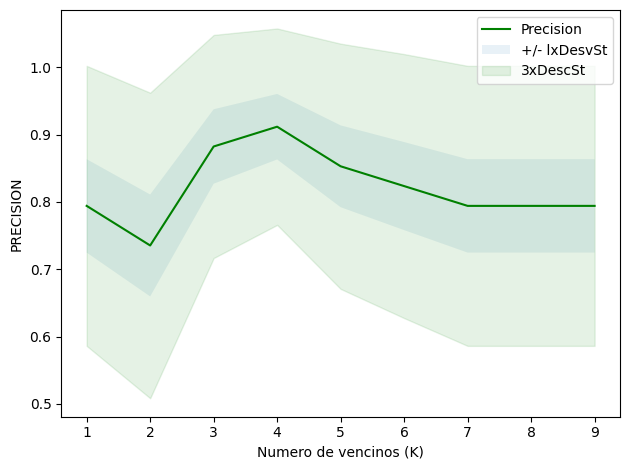

In [37]:
plt.plot(range(1, ks), media_pre, 'g')
plt.fill_between(range(1, ks), media_pre - 1 * ds_pre, media_pre + 1 * ds_pre, alpha=0.10)
plt.fill_between(range(1, ks), media_pre - 3 * ds_pre, media_pre + 3 * ds_pre, alpha=0.10, color="green")
plt.legend(('Precision', '+/- lxDesvSt', '3xDescSt'))
plt.ylabel('PRECISION')
plt.xlabel('Numero de vencinos (K)')
plt.tight_layout()
plt.show()
